# Ex 1: Régression multiple

Nous allons évaluer notre modèle de régression linéaire sur le jeu de données diabetes, que l'on a déjà traité. Ici, nous allons utiliser la variable à expliquer, correspondant à un indice d'évolution de la maladie.
Plus de détails directement sur le site de sklearn : [lien](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

Pour implémenter la régression multiple, nous allons utiliser la modélisation matricielle.

1. Charger les données et faites les analyses statistiques et visualisations qui vous paraissent appropriées. Commentez la deuxième colonne des données.

```python
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
X,y = ...
```

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, scaled=True)

print(X.shape)
print(y.shape)

##print(X)
##print(y)

(442, 10)
(442,)


2. Construisez la matrice $X$ pour la régression. Il faut ajouter une colonne de 1 afin de prendre en compte le coefficient $a_0$

La fusion de tableau sur numpy peut être compliquée, tant de solutions existent. La liste des fonctions existantes est disponible [ici](https://numpy.org/doc/stable/reference/routines.array-manipulation.html#joining-arrays). Un tutoriel est dispo [ici](https://kanoki.org/2020/01/10/concatenating-arrays-in-numpy/).
Pour cet exercice, on utilisera la fonction `np.concatenate` pour fusionner `X` et une matrice de 1 obtenue par `np.ones((n,1))`

In [25]:
import numpy as np

# Ajouter une colonne de 1 pour représenter l'ordonnée à l'origine
X_with_intercept = np.hstack((X, np.ones((X.shape[0], 1))))

3. Calculez le vecteur $\alpha$ optimisant le problème de régression au sens des moindres carrés. Visualisez les différentes valeurs avec `plt.bar`
 
Attention : Il est généralement déconseillé d'inverser une matrice si cela n'est pas absolument nécessaire. Vous devriez trouver la fonction qu'il vous faut [ici](https://numpy.org/doc/stable/reference/routines.linalg.html#solving-equations-and-inverting-matrices)

```python
def fit(X,y):
    ...
    return alpha
```

In [24]:
def fit(X,y):
    alpha = np.linalg.inv(X.T @ X) @ (X.T @ y)
    return alpha

4. Pour chaque observation, calculez $z=X\alpha$ et comparez aux valeurs réelles en calculant la moyenne des valeurs absolues des résidus.

```python
def predict(X,alpha):
    '''
    X : toutes les variables explicatives *sans* la colonne des uns
    
    '''
    return ...

z = predict(X,alpha)
````

In [13]:
def predict(X,alpha):
    '''
    X : toutes les variables explicatives *sans* la colonne des uns
    
    '''
    return X @ alpha

In [17]:
def mean_absolute_residuals(y_true, y_pred):
    residuals = np.abs(y_true - y_pred)
    return np.mean(residuals)

In [26]:
# Ajuster le modèle
alpha = fit(X_with_intercept, y)

# Prédire les valeurs
y_pred = predict(X_with_intercept, alpha)

# Calculer la moyenne des résidus absolus
mae = mean_absolute_residuals(y, y_pred)

print("La moyenne des résidus absolus est :", mae)

La moyenne des résidus absolus est : 43.27745202531506


5. Calculez le coefficient de détermination R² pour évaluer la qualité de votre prédiction. Commentez votre résultat. Quelles pistes pour l'améliorer ?

Bonus : Vous pouvez essayer de le calculer de plusieurs manières différentes

<BarContainer object of 10 artists>

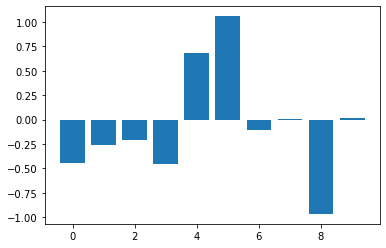

In [31]:
# Extension à un autre dataset, permet de voir que les fonctions sont utiles et correctes
data_pine = np.loadtxt('TP_07_Regression_Multiple_pine_full.csv',skiprows=1,delimiter=",")
X = data_pine[:,:-1]
X_norm = (X - np.mean(X,axis=0))/np.std(X,axis=0)
y = data_pine[:,-1]
alpha = fit(X_norm,y)
z = predict(X_norm,alpha)
np.corrcoef(z,y)[0,1]**2
plt.figure();
plt.bar(np.arange(X.shape[1]),alpha)

## Ex. 2 — Histoire de température
Un méteorologue nous a fourni les données suivantes de température et de concentration en ozone mesurées au centre de la ville de Caen, à la même heure, les lundis de printemps 2007.

|x : Température | y : Ozone|
|:---:| --- |
|23.1 | 81.4|
|18.9 | 52.6|
|16.4 | 48.4|
|14.6 | 38.0|
|20.3 | 39.4|
|25.4 | 34.2|
|21.5 | 61.9|
|22.1 | 77.3|
|17.3 | 34.0|
|14.8 | 49.8|
|25.5 | 97.0|
|23.1 | 67.8|
|24.2 | 92.7|

pour expliquer la concentration d’ozone en fonction de la température, les météorologues proposent le modèle suivant :
\begin{equation}
y = \begin{cases}
    b + \varepsilon & \text{ si } x \lt c\\
    ax + d + \varepsilon & \text{ si } x \ge  c
  \end{cases}
\end{equation}

Ces données sont présentes dans le fichier meteo.csv sur Moodle.

1. Réécrire le modèle en éliminant d en utilisant la contrainte de continuité du modèle

La continuité implique $b = ac+d$ soit $d = b - ac$. Sans $d$ le modèle s'écrit alors : 
\begin{equation}
y = \begin{cases}
    b + \varepsilon & \text{ si } x \lt c\\
    a(x-c) + b + \varepsilon & \text{ si } x \ge  c
  \end{cases}
\end{equation}

2. Sachant que c = 21, donnez l’estimateur de a et b au sens des moindres carrés.

    a) Expliciter  la transformation de X tel que le modèle s’écrive $y = X \alpha + \varepsilon$

x_transform = 0 si x < c, x-c sinon.


In [8]:
import numpy as np
data = np.loadtxt("TP_07_Regression_Multiple_meteo.csv", delimiter=",")
x = data[:, 0]
print(x)
y = data[:, 1]
c=21
x_transform = data[:, 0].copy()

for i,xi in enumerate(x_transform):
    if (xi < c) :
        x_transform[i] = 0
    else :
        x_transform[i] = xi - c

X = np.stack([x_transform, np.ones(len(x_transform))], axis=-1)


[23.1 18.9 16.4 14.6 20.3 25.4 21.5 22.1 17.3 14.8 25.5 23.1 24.2]


b) Calculer l’estimateur de a et b au sens des moindres carrés

```python
alpha = fit(x_new,y)
z = predict(x_new,alpha)
plt.plot(x,y,'o')
x_plot = np.linspace(np.min(x),np.max(x),50)
x_phi_plot = np.array([phi(x_i,c) for x_i in x_plot]).reshape(-1,1)
z_plot = predict(x_phi_plot,alpha)
plt.plot(x_plot,z_plot)
```

c) Visualiser les observations et le modèle de régression

3\. Prédictions
    
 a) Quelle serait d’après votre modèle la concentration d’ozone lorque la température est de 27 degrés.

b) Quelle serait d’après votre modèle la concentration d’ozone lorque la température est de 13 degrés.

4\. Quelle est la qualité de la régression ? Calculez le coefficient de détermination $R^2$

## Bonus : Ex. 3 — Regression

Cherchant à expliquer la température d’un four (y) en fonction de l’hygrométrie (x) un boulanger a réalisé dix huit expériences différentes.

In [14]:
x = np.array([-0.20, 0.72, 0.08, 1.39, 0.22, 0.87, 1.38, 0.94, 0.36, 1.22, 0.74, 0.13, 0.21, 0.56, -0.35, -0.30, 0.48,
0.48])
y = np.array([-0.04, 1.30, 0.08, 1.37, 0.27, 1.36, 1.44, 1.28, 0.62, 1.29, 1.41, 0.12, 0.26, 1.16, -0.04, -0.16, 0.93,
0.83])

1. Le voisin du boulanger, lui même boulanger à la retraite, explique que le modèle linéaire n’est pas le bon. Le bon modèle est le suivant :

\begin{equation}
y = \begin{cases}
    ax^2 + bx + \epsilon  & \text{ si } x \le 0.6\\
    c + \epsilon & \text{ si } x \gt  0.6
  \end{cases}
\end{equation}
    a) Ecrire le modèle sous la forme

\begin{equation}
        y = X\alpha + \epsilon
\end{equation}
et construire la matrice X associée

La contrainte de continuité implique $a 0.36 + b 0.6 = c$. En éliminant $c$  le modèle devient : 
\begin{equation}
y = \begin{cases}
    ax^2 + bx + \epsilon  & \text{ si } x \le 0.6\\
    0.36 a + 0.6 b + \epsilon & \text{ si } x \gt  0.6
  \end{cases}
\end{equation}
et donc
$$
X = \left(
 \begin{array}{cc}
  .2^2 & -.2 \\
 .36 & .6 \\
 .08^2 & .08 \\
 .36 & .6  \\
\vdots & \vdots\\
 .48^2 & .48 
 \end{array}
 \right) 
$$


2\. Estimer les paramètres du modèle

3\. Visualiser les observations et le modèle de régression